<a href="https://colab.research.google.com/github/Kenobi-Knobs/DataScienceSSUCourse/blob/master/Lab%202/lab_2.1_visual_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Лабораторна робота №4. <br> Візуальний аналіз даних про пасажирів Титаніку</center>

**Заповніть код в клітинках замість "Ваш код тут"**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Зчитуємо навчальну вибірку.**

In [2]:
# шлях до папки з даними на моєму github, відредагуйте згідно вашого випадку
data_folder = "https://raw.githubusercontent.com/Kenobi-Knobs/DataScienceSSUCourse/master/Lab%202/data/" 

In [3]:
#train_df = pd.read_csv("data/titanic_train.csv", index_col='PassengerId') 

train_df = pd.read_csv( data_folder+'/titanic_train.csv', index_col='PassengerId' )

In [4]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Відкинемо ознаку `Cabin`, а потім – всі рядки, де є пропуски.**

In [7]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності ознак `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas чи `pairplot` Seaborn).**

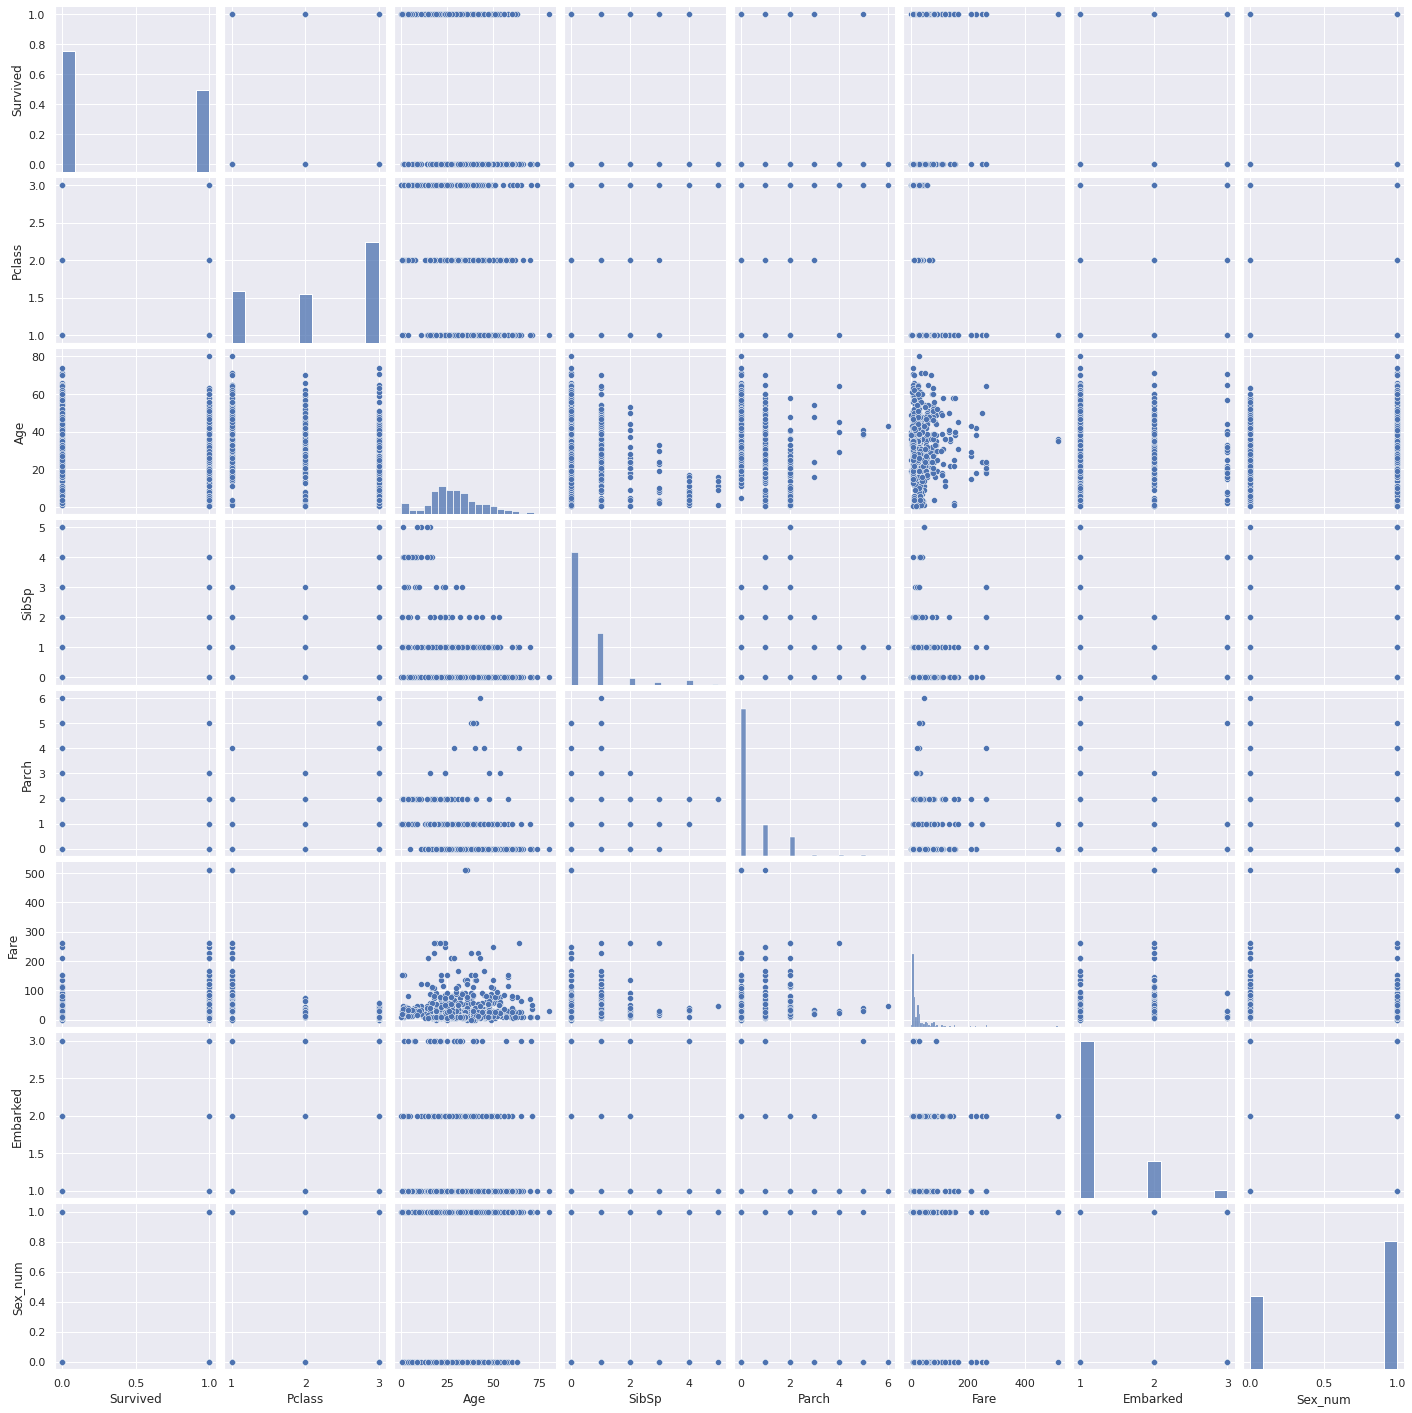

In [10]:
sns.set(rc={'figure.figsize':(15,9)})

def is_nan(num):
  return num != num

def sex_category(sex):
  if is_nan(sex):
    return -1
  elif sex == 'male':
    return 1
  elif sex == 'female':
    return 0
  else:
    return -1

def embarked_category(emb):
  if is_nan(emb):
    return 0
  elif emb == 'S':
    return 1
  elif emb == 'C':
    return 2
  elif emb == 'Q':
    return 3
  else:
    return 0

sex_cat = [sex_category(sex) for sex in train_df.Sex]
train_df["Sex_num"] = sex_cat

emb_cat = [embarked_category(emb) for emb in train_df.Embarked]
train_df["Embarked"] = emb_cat

sns.pairplot(train_df)

**Як плата за білет (`Fare`) залежить від класу каюти (`Pclass`)? Побудуйте boxplot.**

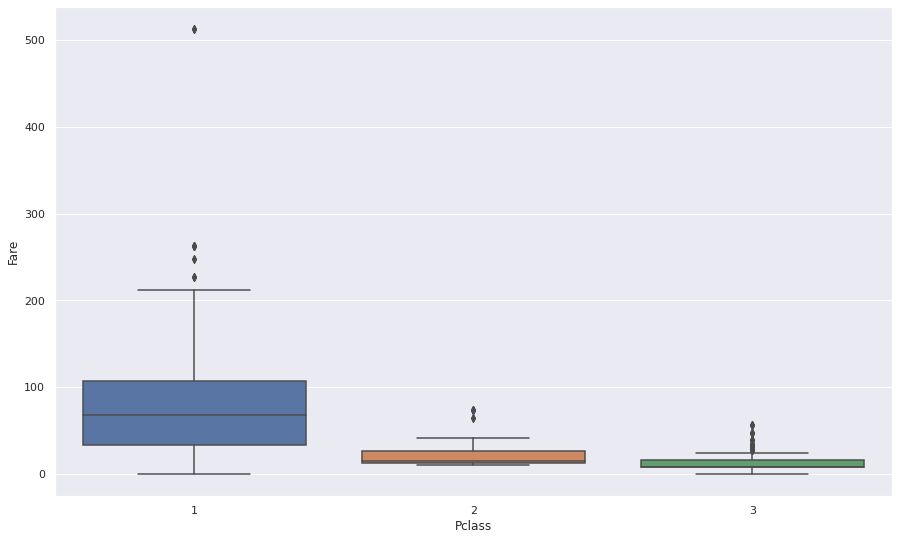

In [11]:
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(x="Pclass", y="Fare", data=train_df)

**Такий boxplot виходить не дуже красивим із-за викидів.** 

**Опціонально: створіть ознаку `Fare_no_out` (вартість без викидів), в якій виключається вартість, що відрізняється від середнього по класу більш ніж на 2 стандартних відхилення. Важливо: потрібно виключити викиди саме в залежності від класу каюти. Інакше виключатися будуть тільки найбільші (1 клас) і малі (3 клас) вартості.**

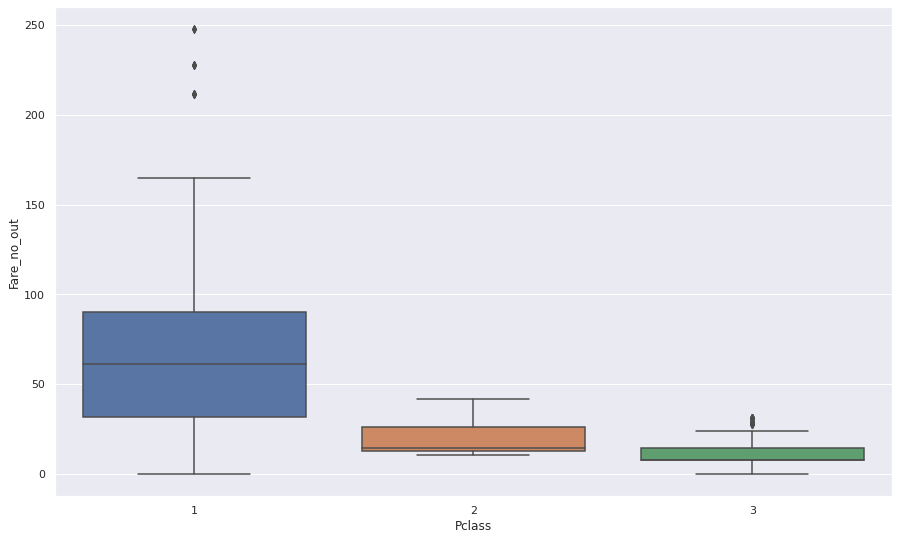

In [16]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[abs(fare_pclass1.mean()-fare_pclass1) <= 2*(fare_pclass1.std())]
fare_pclass2_no_out = fare_pclass2[abs(fare_pclass2.mean()-fare_pclass2) <= 2*(fare_pclass2.std())]
fare_pclass3_no_out = fare_pclass3[abs(fare_pclass3.mean()-fare_pclass3) <= 2*(fare_pclass3.std())]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

sns.boxplot(x="Pclass", y="Fare_no_out", data=train_df)

**Яке відношення загиблих і виживших в залежності від статі? Відобразіть з допомогою Seaborn.countplot з аргументом hue.**

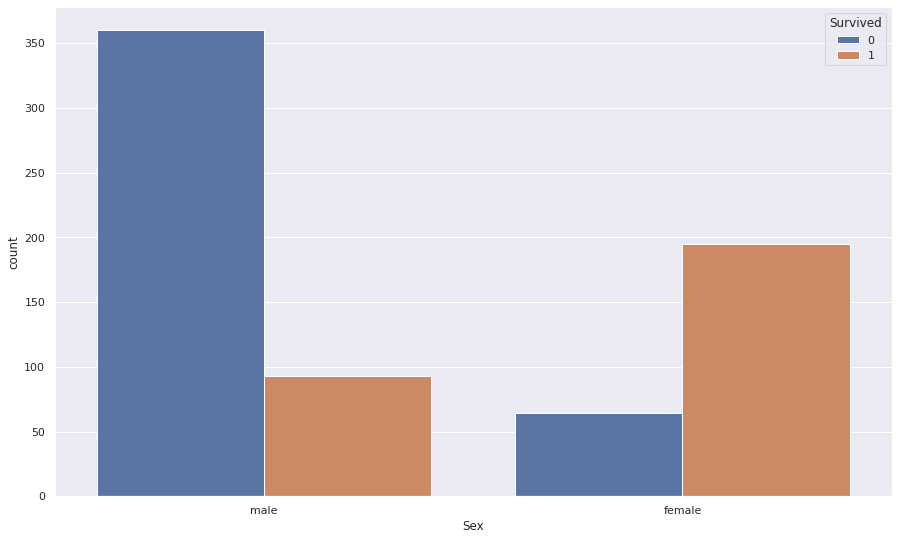

In [17]:
sns.countplot(x="Sex", hue="Survived", data=train_df)

**Яке співідношення загиблих і виживших в залежності від класу каюти? Відобразівть за допомогою Seaborn.countplot з аргументом hue.**

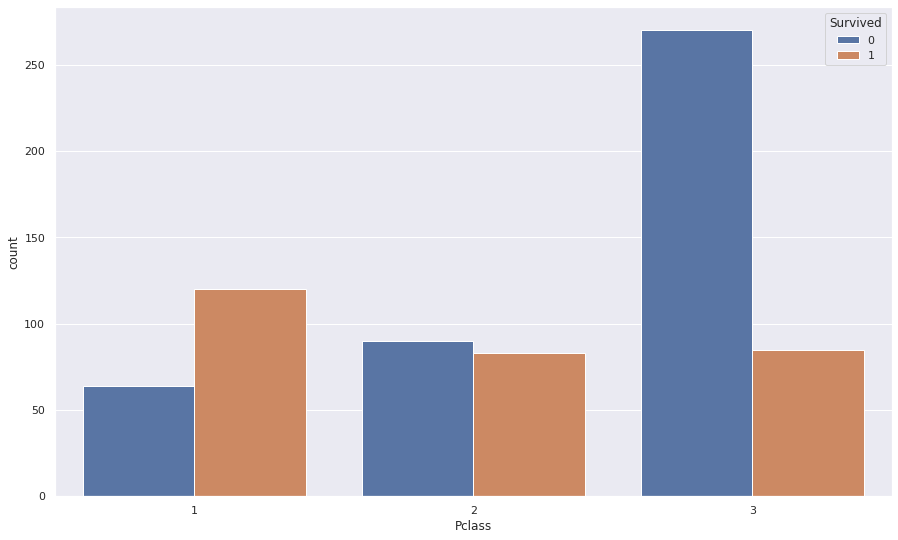

In [18]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодші 30 років, похилого віку – старші 60 років.**

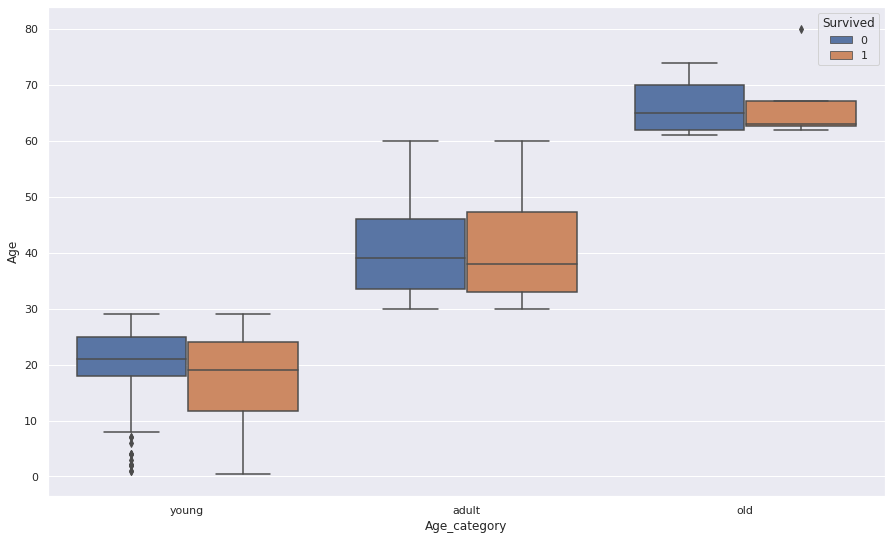

In [20]:
def is_nan(num):
  return num != num

def age_category(age):
  '''
  < 30 -> 1
  >= 30, <= 60 -> 2
  > 60 -> 3
  '''
  if is_nan(age):
    return "unknown"
  elif age < 30:
    return "young"
  elif age <= 60:
    return "adult"
  else:
    return "old"

age_cat = [age_category(age) for age in train_df.Age]
train_df["Age_category"] = age_cat

sns.boxplot(x="Age_category", y="Age", hue="Survived", data=train_df)
